# **Recommendation System with Cosine Similarity**

In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
df = pd.read_csv("/content/P190823 FINAL.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (70,630,631,890,891,892,893,894,895,896,897,933,934) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df2 = df[['DV_Age', 'Gender', 'DV_State', 'DV_Region', 'Income', 'OE_MoviesAllTime_1_PleaseLeaveThis', 'OE_MoviesAllTime_2_PleaseLeaveThis', 'OE_MoviesAllTime_3_PleaseLeaveThis', 
    'OE_MoviesAllTime_4_PleaseLeaveThis', 'OE_MoviesAllTime_5_PleaseLeaveThis', 'Ethnicity1', 'Ethnicity2', 'Ethnicity3', 'Ethnicity4', 'Ethnicity5', 'DV_GenreMovieTopRank']].copy()

In [4]:
df3 = df2.copy()

# **Preprocessing the Data**

In [5]:
df3['DV_GenreMovieTopRank'] = df3['DV_GenreMovieTopRank'].replace({1:'Action', 
                                                                   2:'Adventure', 
                                                                   3:'Crime/Gangster', 
                                                                   4:'Comedy', 
                                                                   5:'Kids/Family', 
                                                                   6:'Fantasy',
                                                                   7:'Historical', 
                                                                   8:'Horror', 
                                                                   9:'Romantic Comedy', 
                                                                   10:'Science Fiction', 
                                                                   11:'Romantic Drama', 
                                                                   12:'Mystery/Thriller', 
                                                                   13:'Documentary', 
                                                                   14:'Musicals/Dance', 
                                                                   15:'War', 
                                                                   16:'Westerns', 
                                                                   17:'Dystopian', 
                                                                   18:'Spy', 
                                                                   19:'Foreign', 
                                                                   20:'Special Events',
                                                                   21:'Superhero'})

In [6]:
'Star Wars' in df3['OE_MoviesAllTime_2_PleaseLeaveThis'].values

True

In order to enhance the recommender system, we will preprocess the data by removing the duplicates values. We utilize duplicated() to analyze duplicated values and remove the duplicate values by using drop_duplicates().

In [7]:
#Change the type from object to string
df3['OE_MoviesAllTime_2_PleaseLeaveThis'] = df3['OE_MoviesAllTime_2_PleaseLeaveThis'].fillna("").astype('str')

In [8]:
#Duplicated values
df3['OE_MoviesAllTime_2_PleaseLeaveThis'].duplicated().sum()

1876

In [9]:
#Non duplicated values
(~df3['OE_MoviesAllTime_2_PleaseLeaveThis'].duplicated()).sum()

1322

In [10]:
#Extract duplicated rows
df3.loc[df3['OE_MoviesAllTime_2_PleaseLeaveThis'].duplicated(),:]

,DV_Age,Gender,DV_State,DV_Region,Income,OE_MoviesAllTime_1_PleaseLeaveThis,OE_MoviesAllTime_2_PleaseLeaveThis,OE_MoviesAllTime_3_PleaseLeaveThis,OE_MoviesAllTime_4_PleaseLeaveThis,OE_MoviesAllTime_5_PleaseLeaveThis,Ethnicity1,Ethnicity2,Ethnicity3,Ethnicity4,Ethnicity5,DV_GenreMovieTopRank
21,49,2,43,3,7,Harry Potter and the Half-Blood Prince,Harry Potter and the Chamber of Secrets,Black Panther,Fast and Furious,The Hangover,0,0,1,0,0,Action
40,39,1,9,3,5,Goodfellas,Avengers: Endgame,Life Is Beautiful,Star Wars: Episode IV - A New Hope,Guardians of the Galaxy,1,0,0,0,0,Mystery/Thriller
44,54,2,5,4,6,Sense and Sensibility,The Sound of Music,The Shawshank Redemption,Goodfellas,Selena,1,0,0,0,0,Comedy
57,42,2,46,3,7,Avengers: Endgame,,,,,0,0,1,0,0,Superhero
66,29,2,5,4,6,Harry Potter and the Prisoner of Azkaban,,,,,0,0,1,0,0,Superhero
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3187,39,2,23,1,,Twilight,Coraline,IT,Bride of Chucky,Halloween,1,0,0,0,0,Superhero
3188,41,2,35,1,,Transformers,Fast and Furious,Avengers: Endgame,Friday the 13th,,1,0,0,0,0,Superhero
3190,49,2,14,1,,Ghost,Empire Records,BATMAN,,,0,1,0,0,0,Superhero
3196,42,2,21,2,,Avengers: Infinity War,Captain America: The First Avenger,,,,0,1,0,0,0,Action


In [11]:
#Keep the first occurence of the duplicated values
df3.loc[df3['OE_MoviesAllTime_2_PleaseLeaveThis'].duplicated(keep='first'),:]

,DV_Age,Gender,DV_State,DV_Region,Income,OE_MoviesAllTime_1_PleaseLeaveThis,OE_MoviesAllTime_2_PleaseLeaveThis,OE_MoviesAllTime_3_PleaseLeaveThis,OE_MoviesAllTime_4_PleaseLeaveThis,OE_MoviesAllTime_5_PleaseLeaveThis,Ethnicity1,Ethnicity2,Ethnicity3,Ethnicity4,Ethnicity5,DV_GenreMovieTopRank
21,49,2,43,3,7,Harry Potter and the Half-Blood Prince,Harry Potter and the Chamber of Secrets,Black Panther,Fast and Furious,The Hangover,0,0,1,0,0,Action
40,39,1,9,3,5,Goodfellas,Avengers: Endgame,Life Is Beautiful,Star Wars: Episode IV - A New Hope,Guardians of the Galaxy,1,0,0,0,0,Mystery/Thriller
44,54,2,5,4,6,Sense and Sensibility,The Sound of Music,The Shawshank Redemption,Goodfellas,Selena,1,0,0,0,0,Comedy
57,42,2,46,3,7,Avengers: Endgame,,,,,0,0,1,0,0,Superhero
66,29,2,5,4,6,Harry Potter and the Prisoner of Azkaban,,,,,0,0,1,0,0,Superhero
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3187,39,2,23,1,,Twilight,Coraline,IT,Bride of Chucky,Halloween,1,0,0,0,0,Superhero
3188,41,2,35,1,,Transformers,Fast and Furious,Avengers: Endgame,Friday the 13th,,1,0,0,0,0,Superhero
3190,49,2,14,1,,Ghost,Empire Records,BATMAN,,,0,1,0,0,0,Superhero
3196,42,2,21,2,,Avengers: Infinity War,Captain America: The First Avenger,,,,0,1,0,0,0,Action


In [12]:
#Drop duplicated values
df3 = df3.drop_duplicates(subset = ['OE_MoviesAllTime_2_PleaseLeaveThis'], keep = 'first')

In [13]:
#Sort the values in descending order
display(df3['OE_MoviesAllTime_2_PleaseLeaveThis'].value_counts().sort_values(ascending=False))

Pearl Harbor                      1
Star wars                         1
House Party                       1
Clue                              1
Robin Hood                        1
                                 ..
A Walk to Remember                1
King Arthur                       1
The Nightmare Before Christmas    1
Walking Tall                      1
Empire Records                    1
Name: OE_MoviesAllTime_2_PleaseLeaveThis, Length: 1322, dtype: int64

In [14]:
#df3.rename(columns = {'OE_MoviesAllTime_2_PleaseLeaveThis':'title'}, inplace = True)

# **Explore the Data**

In [53]:
import matplotlib.pyplot as plt

#Remove '|' in the genres column
# df3['DV_GenreMovieTopRank'] = df3['DV_GenreMovieTopRank'].str.replace('|',' ')

#Count the number of occurences for each genre in the data set
counts = dict()
for i in df3.index:
   for g in df3.loc[i,'DV_GenreMovieTopRank'].split('/'):
      if g not in counts:
         counts[g] = 1
      else:
         counts[g] = counts[g] + 1

genres = pd.DataFrame.from_dict(counts, orient='index')
genres.reset_index(level=0, inplace=True)
genres.columns = ['genres','genres_count']

#Create a bar chart
fig = px.bar(genres, x='genres', y='genres_count', text='genres_count',
            title="Number of Genres in the DataFrame")
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.update_traces(marker_color='rgb(158,202,225)', marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5, opacity=0.6)
fig.show()

# **Movie Recommendation Based on Genres**

In [16]:

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vector = TfidfVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')
tfidf_matrix = tfidf_vector.fit_transform(df3['DV_GenreMovieTopRank'])
tfidf_matrix.shape

(1322, 35)

In [17]:
tfidf_vector.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['action',
 'adventure',
 'comedy',
 'crime',
 'crime gangster',
 'dance',
 'documentary',
 'drama',
 'dystopian',
 'events',
 'family',
 'fantasy',
 'fiction',
 'foreign',
 'gangster',
 'historical',
 'horror',
 'kids',
 'kids family',
 'musicals',
 'musicals dance',
 'mystery',
 'mystery thriller',
 'romantic',
 'romantic comedy',
 'romantic drama',
 'science',
 'science fiction',
 'special',
 'special events',
 'spy',
 'superhero',
 'thriller',
 'war',
 'westerns']

In [18]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
#cosine_sim[:4, :4]

In [19]:
sim = pd.DataFrame(cosine_sim)
sim

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1282,1283,1284,1285,1286,1287,1288,1289,1290,1291,1292,1293,1294,1295,1296,1297,1298,1299,1300,1301,1302,1303,1304,1305,1306,1307,1308,1309,1310,1311,1312,1313,1314,1315,1316,1317,1318,1319,1320,1321
0,1.000000,0.0,0.0,0.0,0.0,0.427144,0.0,0.0,0.0,0.427144,0.0,0.0,0.290755,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.427144,0.0,0.0,0.427144,0.0,0.0,0.0,0.0,...,0.0,0.0,0.427144,1.000000,0.427144,0.0,0.427144,0.290755,0.0,0.0,0.0,0.0,0.0,0.427144,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.427144,0.0,0.0,0.0,0.427144,0.0,0.0,0.0,0.0,0.290755,0.427144,0.0
1,0.000000,1.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
2,0.000000,0.0,1.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,1.0,0.0,0.0,1.0,0.0,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,1.0
3,0.000000,0.0,0.0,1.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
4,0.000000,0.0,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1317,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,1.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,1.0,0.0,1.0,0.0,0.000000,0.000000,0.0
1318,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.0,0.000000,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.0,0.000000,0.000000,0.0
1319,0.290755,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.290755,0.000000,0.0,0.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.000000,0.000000,0.0
1320,0.427144,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,1.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0

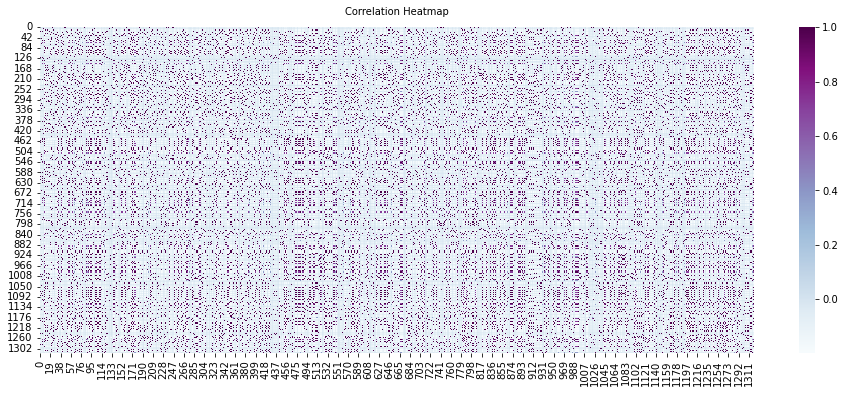

In [20]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(sim.iloc[:, :-1].corr(), cmap="BuPu")
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':10}, pad=12);

In [21]:
# Build a 1-dimensional array with movie titles
titles = df3['OE_MoviesAllTime_2_PleaseLeaveThis']
indices = pd.Series(df3.index, index=df3['OE_MoviesAllTime_2_PleaseLeaveThis'])

# Function that get movie recommendations based on the cosine similarity score of movie genres
def genre_recommendations(title):
    idx = indices[title]
    # print(idx)
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:21]
    movie_indices = [i[0] for i in sim_scores]
    
    scores = [z[1] for z in sim_scores]
    sim_scores_df = pd.DataFrame(sim_scores)
    sim_scores_df.columns = ['movie_index', 'similarity_score']
    
    similar_movie_list = titles.iloc[movie_indices]
    similar_movie_list_df = pd.DataFrame(similar_movie_list.sort_values(ascending=False))
    similar_movie_list_df.reset_index(level=0, inplace=True)
    similar_movie_list_df.columns = ['movie_index','movie_title']
    similar_movie_list_df2 = pd.merge(similar_movie_list_df, sim_scores_df, on='movie_index')
    return similar_movie_list_df

In [22]:
genre_recommendations('Spiderman')

,movie_index,movie_title
0,30,family guy
1,342,The Lord of the Rings: The Return of the King
2,210,The Lord of the Rings: The Fellowship of the Ring
3,217,The Lion King
4,168,The Dark Knight
5,324,Taxi Driver
6,156,Superman
7,49,Star Wars: Episode V - The Empire Strikes Back
8,526,Star Trek Beyond
9,344,Smokey and the Bandit


In [23]:
genre_recommendations('Star Wars')

,movie_index,movie_title
0,169,Vision Quest
1,28,Toy Story
2,160,Tootsie
3,92,The Wedding Singer
4,76,The Greatest Showman
5,63,The Godfather
6,211,Sky High
7,54,Signs
8,196,Pie
9,175,Meet Joe Black


In [24]:
title = 'Star Wars'

**Note:** The same code can be used to find the similar movies, but based on the titles.

# **Movie Recommendation Based on Movie Title**

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vector = TfidfVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')
tfidf_matrix = tfidf_vector.fit_transform(df3['OE_MoviesAllTime_2_PleaseLeaveThis'])
tfidf_matrix.shape

(1322, 2711)

In [26]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
cosine_sim[:4, :4]

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [27]:
sim_df = pd.DataFrame(cosine_sim)
sim_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1282,1283,1284,1285,1286,1287,1288,1289,1290,1291,1292,1293,1294,1295,1296,1297,1298,1299,1300,1301,1302,1303,1304,1305,1306,1307,1308,1309,1310,1311,1312,1313,1314,1315,1316,1317,1318,1319,1320,1321
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1317,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1318,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1319,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1320,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


# **Principle Component Analysis**

Based on the, exploratory analysis our data is not highly correlated, this is why our result is better of without conducting the PCA. If you want the see the difference in the result you can run the following cells.

In [28]:
def get_pca_components(pca, var):
    cumm_var = pca.explained_variance_ratio_
    total_var = 0.
    N_COMPONENTS = 0
    for i in cumm_var:
        N_COMPONENTS += 1
        total_var += i
        if total_var >= var:
            break
    return N_COMPONENTS

In [29]:
pca = PCA().fit(sim)
n_components = get_pca_components(pca, 0.95)

In [35]:
pca = PCA(n_components=n_components)
cosine_sim_df = pca.fit_transform(sim_df)

In [36]:
sim2 = pd.DataFrame(cosine_sim_df)

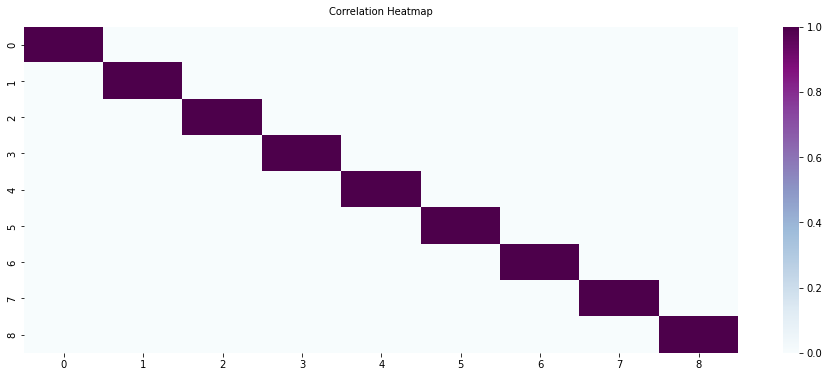

In [37]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(sim2.iloc[:, :-1].corr(), cmap="BuPu")
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':10}, pad=12);

In [38]:
# Build a 1-dimensional array with movie titles
titles = df3['OE_MoviesAllTime_2_PleaseLeaveThis']
indices = pd.Series(df3.index, index=df3['OE_MoviesAllTime_2_PleaseLeaveThis'])

# Function that get movie recommendations based on the cosine similarity score of movie genres
def genre_recommendations(title):
    idx = indices[title]
    # print(idx)
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:21]
    movie_indices = [i[0] for i in sim_scores]
    
    scores = [z[1] for z in sim_scores]
    sim_scores_df = pd.DataFrame(sim_scores)
    sim_scores_df.columns = ['movie_index', 'similarity_score']
    
    similar_movie_list = titles.iloc[movie_indices]
    similar_movie_list_df = pd.DataFrame(similar_movie_list.sort_values(ascending=False))
    similar_movie_list_df.reset_index(level=0, inplace=True)
    similar_movie_list_df.columns = ['movie_index','movie_title']
    similar_movie_list_df2 = pd.merge(similar_movie_list_df, sim_scores_df, on='movie_index')
    return similar_movie_list_df.sort_values

In [40]:
genre_recommendations('Spiderman')

<bound method DataFrame.sort_values of    movie_index                         movie_title
0            3                   The Monster Squad
1            2               The Lord of the Rings
2            5  Star Wars: Episode IV - A New Hope
3            4                    Some Like It Hot
4            1             One Night with the King
5            7                          La La Land
6            8                          Goodfellas
7            0                   Facing the Giants
8            9                         Break Point>

In [41]:
genre_recommendations('Star Wars')

<bound method DataFrame.sort_values of    movie_index                                   movie_title
0            3                             The Monster Squad
1            5            Star Wars: Episode IV - A New Hope
2            4                              Some Like It Hot
3            1                       One Night with the King
4            7                                    La La Land
5            6  Harry Potter and the Deathly Hallows: Part 1
6            8                                    Goodfellas
7            0                             Facing the Giants
8            9                                   Break Point>